In [24]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [47]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [237]:
df = pd.read_csv('cache/VRE.csv', index_col=['Date'], parse_dates=True)
df

,Open,High,Low,Close,Volume,Ticker,rsi_10,rsi_15,rsi_20,rsi_25,...,disparity_index_100,ma_10,upper_b10,lower_b10,ma_20,upper_b20,lower_b20,ma_30,upper_b30,lower_b30
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-06,32151.0,32151.0,32151.0,32151.0,800,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,NaN,NaN,32151.0,NaN,NaN,32151.000,NaN,NaN
2017-11-07,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-08,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-09,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-10,34371.0,34371.0,34371.0,34371.0,31030,VRE,100.000,100.000,100.000,100.000,...,NaN,32595.0,33587.814,31602.186,32595.0,33587.814,31602.186,32595.000,33587.814,31602.186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,26000.0,26450.0,25250.0,25500.0,1575440,VRE,52.180,49.853,48.638,47.961,...,-6.357,24680.0,26120.717,23239.283,24640.0,25868.992,23411.008,25306.667,26744.621,23868.712
2022-11-08,25500.0,25750.0,24800.0,25250.0,1798794,VRE,50.300,48.631,47.711,47.202,...,-7.135,24905.0,26224.817,23585.183,24720.0,25933.130,23506.870,25260.000,26675.396,23844.604
2022-11-09,25300.0,26150.0,24800.0,25400.0,1916256,VRE,51.455,49.425,48.331,47.719,...,-6.470,25225.0,26142.802,24307.198,24780.0,25995.730,23564.270,25211.667,26595.295,23828.038


In [238]:
pd.set_option('display.precision', 3)
df

,Open,High,Low,Close,Volume,Ticker,rsi_10,rsi_15,rsi_20,rsi_25,...,disparity_index_100,ma_10,upper_b10,lower_b10,ma_20,upper_b20,lower_b20,ma_30,upper_b30,lower_b30
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-06,32151.0,32151.0,32151.0,32151.0,800,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,NaN,NaN,32151.0,NaN,NaN,32151.000,NaN,NaN
2017-11-07,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-08,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-09,32151.0,32151.0,32151.0,32151.0,0,VRE,NaN,NaN,NaN,NaN,...,NaN,32151.0,32151.000,32151.000,32151.0,32151.000,32151.000,32151.000,32151.000,32151.000
2017-11-10,34371.0,34371.0,34371.0,34371.0,31030,VRE,100.000,100.000,100.000,100.000,...,NaN,32595.0,33587.814,31602.186,32595.0,33587.814,31602.186,32595.000,33587.814,31602.186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-07,26000.0,26450.0,25250.0,25500.0,1575440,VRE,52.180,49.853,48.638,47.961,...,-6.357,24680.0,26120.717,23239.283,24640.0,25868.992,23411.008,25306.667,26744.621,23868.712
2022-11-08,25500.0,25750.0,24800.0,25250.0,1798794,VRE,50.300,48.631,47.711,47.202,...,-7.135,24905.0,26224.817,23585.183,24720.0,25933.130,23506.870,25260.000,26675.396,23844.604
2022-11-09,25300.0,26150.0,24800.0,25400.0,1916256,VRE,51.455,49.425,48.331,47.719,...,-6.470,25225.0,26142.802,24307.198,24780.0,25995.730,23564.270,25211.667,26595.295,23828.038


In [239]:
df.describe()

,Open,High,Low,Close,Volume,rsi_10,rsi_15,rsi_20,rsi_25,natr_10,...,disparity_index_100,ma_10,upper_b10,lower_b10,ma_20,upper_b20,lower_b20,ma_30,upper_b30,lower_b30
count,1256.000,1256.000,1256.000,1256.000,1.256e+03,1252.000,1252.000,1252.000,1252.000,1247.000,...,1157.000,1256.000,1255.000,1255.000,1256.000,1255.000,1255.000,1256.000,1255.000,1255.000
mean,31467.633,31960.585,31006.842,31470.968,3.479e+06,49.818,49.837,49.873,49.911,3.229,...,-1.643,31496.579,32378.736,30613.379,31535.756,32746.821,30323.710,31580.677,33003.298,30157.147
std,4440.736,4481.654,4359.201,4382.915,2.868e+06,13.017,10.714,9.349,8.446,1.285,...,9.731,4257.178,4414.747,4167.272,4139.326,4358.701,4024.149,4049.935,4286.522,3942.174
min,17700.000,18000.000,16900.000,17700.000,0.000e+00,4.662,9.324,13.335,16.580,1.120,...,-43.934,19330.000,20137.328,18421.765,21022.500,22990.633,18801.806,22393.333,25046.982,19593.923
25%,28300.000,28650.000,28000.000,28350.000,1.447e+06,40.862,42.680,44.105,44.825,2.242,...,-7.809,28379.150,28977.615,27752.849,28388.750,29362.105,27377.570,28509.167,29513.905,27435.083
50%,31200.000,31700.000,30800.000,31200.000,2.516e+06,49.217,49.306,49.736,49.670,2.952,...,-1.254,31130.000,32081.461,30400.769,31177.750,32524.750,30073.021,31257.500,32707.870,29847.533
75%,34290.250,34700.000,33950.000,34250.000,4.727e+06,58.389,56.186,55.035,54.319,3.972,...,4.669,34242.500,35016.253,33452.910,34191.075,35190.330,33055.873,34115.417,35266.772,32916.562
max,47652.000,48762.000,47176.000,48365.000,2.490e+07,100.000,100.000,100.000,100.000,8.814,...,30.916,45479.200,47405.563,43638.609,43772.500,46543.759,41447.688,42685.667,45652.755,39920.585


In [240]:
df.dropna(axis=0, inplace=True)
df.drop(['Open', 'High', 'Low', 'Volume', 'Ticker'], axis=1, inplace=True)

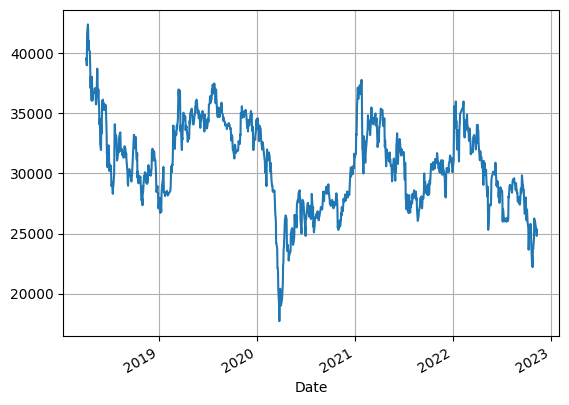

In [241]:
df['Close'].plot(grid=True)
plt.show()

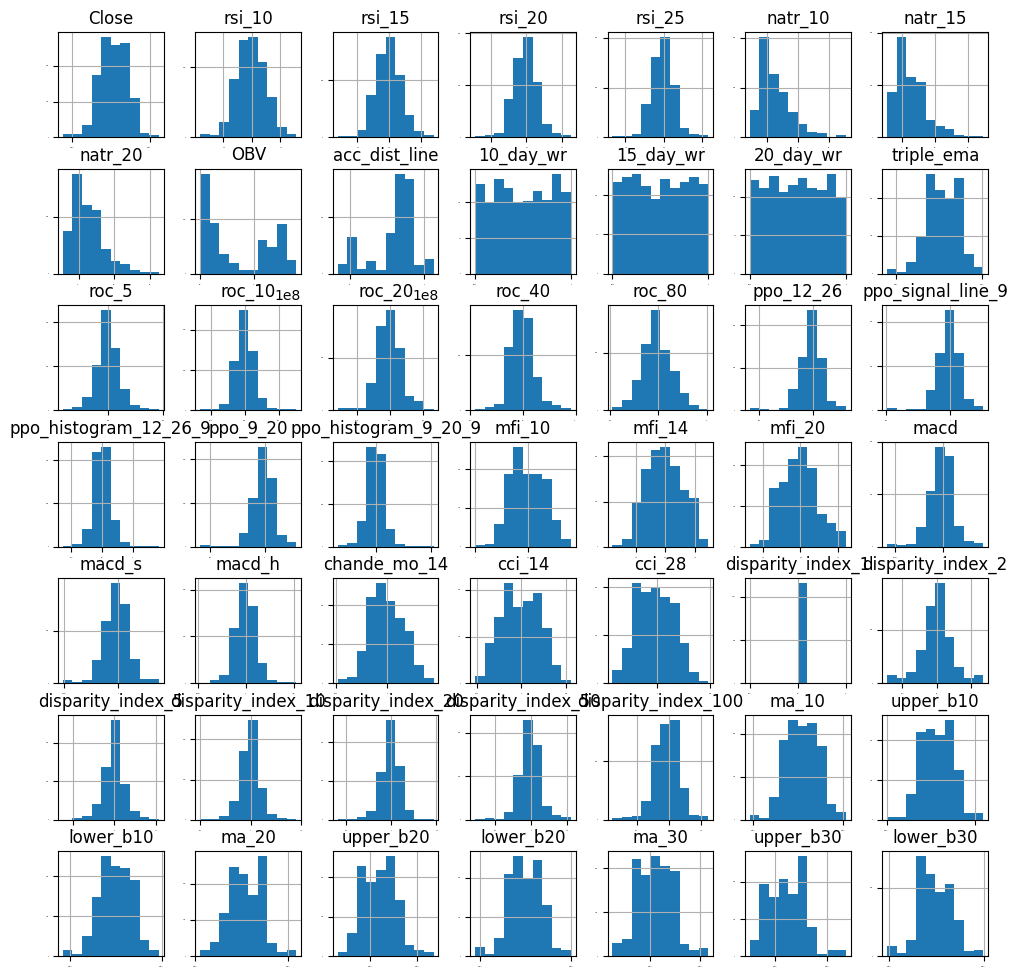

In [242]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

Predict for next 3 sessions

In [243]:
return_period = 3

In [244]:
df['pred_3_days'] = np.log(df['Close']).diff(return_period).shift(-return_period)
df.tail()

,Close,rsi_10,rsi_15,rsi_20,rsi_25,natr_10,natr_15,natr_20,OBV,acc_dist_line,...,ma_10,upper_b10,lower_b10,ma_20,upper_b20,lower_b20,ma_30,upper_b30,lower_b30,pred_3_days
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-07,25500.0,52.180,49.853,48.638,47.961,5.549,5.281,5.696,379751223,-1.816e+08,...,24680.0,26120.717,23239.283,24640.0,25868.992,23411.008,25306.667,26744.621,23868.712,-0.028
2022-11-08,25250.0,50.300,48.631,47.711,47.202,5.089,5.320,5.554,377952429,-1.817e+08,...,24905.0,26224.817,23585.183,24720.0,25933.130,23506.870,25260.000,26675.396,23844.604,0.002
2022-11-09,25400.0,51.455,49.425,48.331,47.719,5.197,5.407,5.226,379868685,-1.819e+08,...,25225.0,26142.802,24307.198,24780.0,25995.730,23564.270,25211.667,26595.295,23828.038,NaN
2022-11-10,24800.0,46.684,46.369,46.035,45.852,5.121,5.618,5.202,378421479,-1.826e+08,...,25330.0,26110.028,24549.972,24740.0,25940.395,23539.605,25131.667,26464.830,23798.503,NaN
2022-11-11,25300.0,50.860,49.163,48.189,47.627,4.802,5.402,5.049,380362122,-1.812e+08,...,25490.0,26023.750,24956.250,24745.0,25947.618,23542.382,25041.667,26260.773,23822.560,NaN


In [245]:
subset_dataset = df.loc['2012-01-01':'2019-01-01']

In [246]:
Y = np.where(subset_dataset['pred_3_days'] > 0, 1, 0)
X = subset_dataset.loc[:, df.columns != 'pred_3_days']
validation_size = 0.2
seed = 1
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=1)

In [247]:
# test options for classification
num_folds = 10
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring ='neg_log_loss'
#scoring = 'roc_auc'

In [248]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#Neural Network
models.append(('NN', MLPClassifier()))
#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [249]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.709167 (0.093110)
LDA: 0.790000 (0.100350)
KNN: 0.690000 (0.133219)
CART: 0.737500 (0.111430)
NB: 0.624167 (0.092211)
NN: 0.502083 (0.153379)
AB: 0.748750 (0.123632)
GBM: 0.775000 (0.086623)
RF: 0.815417 (0.087640)


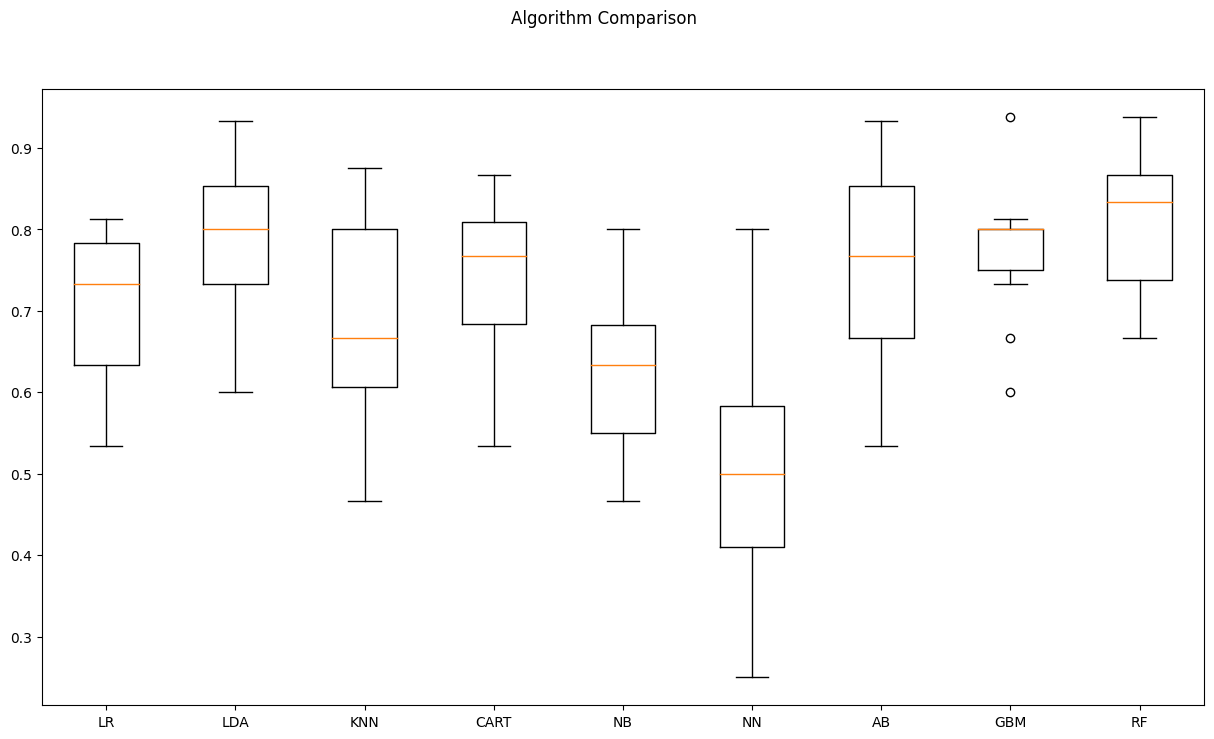

In [250]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

In [251]:
# Grid Search: Random Forest Classifier
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables    
criterion : string, optional (default=”gini”)
    The function to measure the quality of a split. 
    Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. 
    
'''   
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
n_estimators = [20,80]
max_depth= [5,10]
criterion = ["gini","entropy"]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier(n_jobs=-1)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.808750 using {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#8 0.762083 (0.104524) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 20}
#3 0.789583 (0.091577) with: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 80}
#4 0.782500 (0.092886) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 20}
#1 0.808750 (0.095787) with: {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 80}
#6 0.768750 (0.112781) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}
#7 0.762083 (0.104524) with: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 80}
#5 0.769167 (0.078775) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}
#2 0.802917 (0.103549) with: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 80}


In [252]:
# prepare model
model = RandomForestClassifier(criterion='gini', n_estimators=80,max_depth=10,n_jobs=-1) # rbf is default kernel
#model = LogisticRegression() 
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, n_estimators=80, n_jobs=-1)

In [253]:
# estimate accuracy on validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7692307692307693
[[20  4]
 [ 5 10]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        24
           1       0.71      0.67      0.69        15

    accuracy                           0.77        39
   macro avg       0.76      0.75      0.75        39
weighted avg       0.77      0.77      0.77        39



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

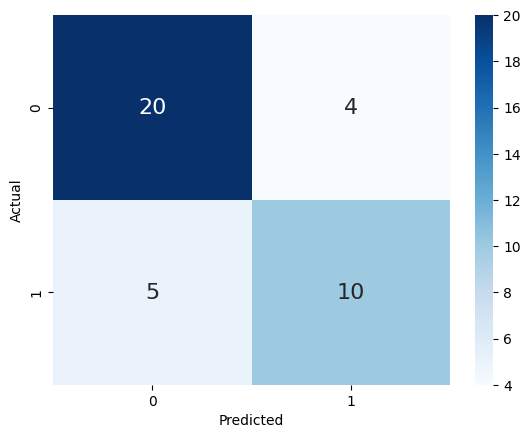

In [254]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font sizes

Text(0.5, 0, 'Variable Importance')

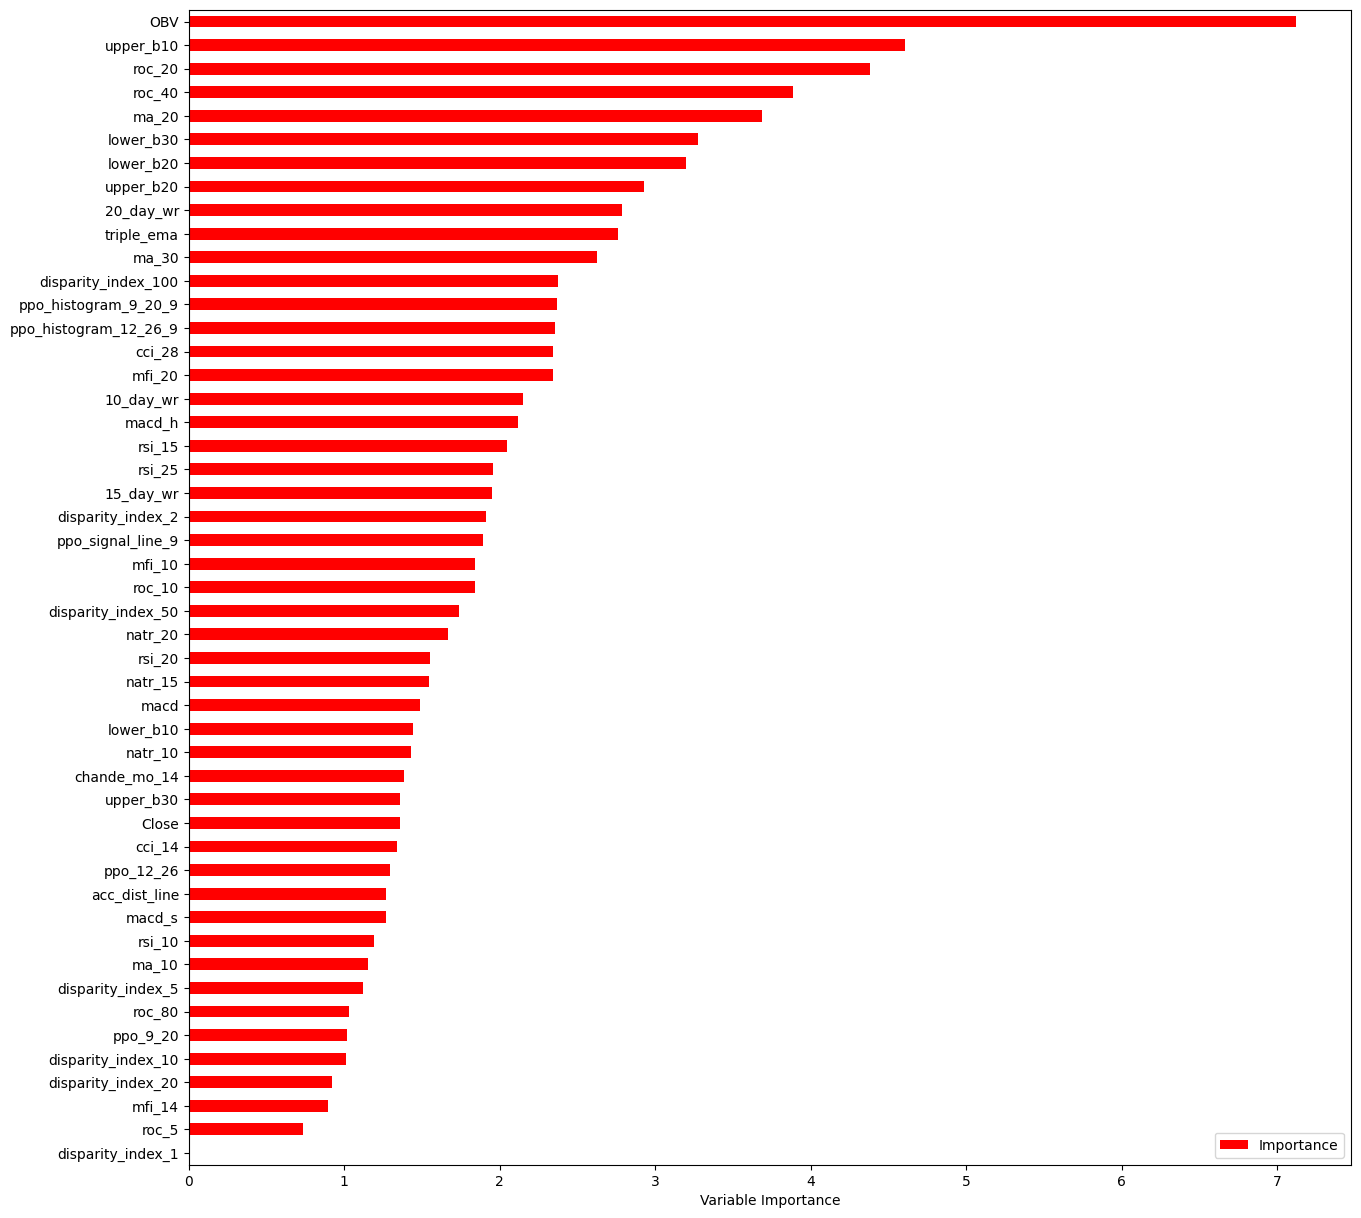

In [255]:
Importance = pd.DataFrame({'Importance':model.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize=(15,15))
plt.xlabel('Variable Importance')

<AxesSubplot: >

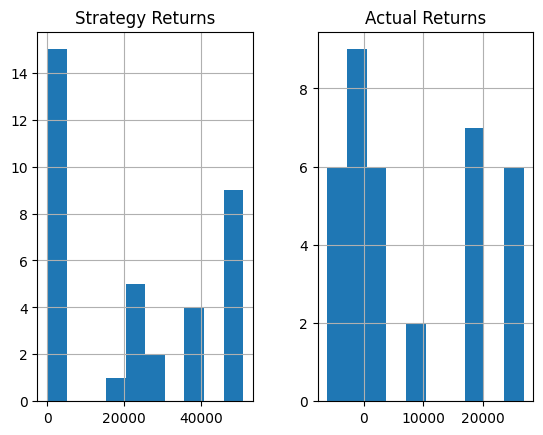

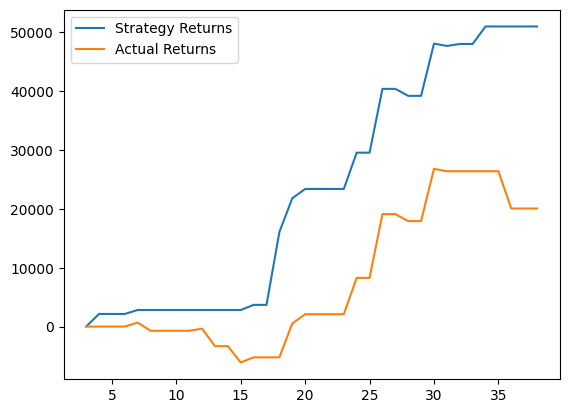

In [256]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_validation.index)
#backtestdata = pd.DataFrame()
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = Y_validation
backtestdata['Market Returns'] = X_validation['Close'].diff(return_period)
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(3)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(3)
backtestdata=backtestdata.reset_index()
backtestdata.head()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()

In [257]:
return_period

3